In [5]:
#Importing Libraries
#Pandas and NumPy: Used for handling data in tabular form.
#NLTK (Natural Language Toolkit): Used for natural language processing tasks, including stopword removal and lemmatization.
#Scikit-Learn: Used for machine learning tasks, including data splitting, Naive Bayes classifier, and metrics calculation.
#Matplotlib and Seaborn: Used for data visualization.
#Precision-Recall Curve: Specifically used for binary classification evaluation.

In [14]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, precision_recall_curve
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#Loading and Preprocessing Data
#Data Loading: Reads the CSV file containing the sentiment data.
#Text Preprocessing: Cleans and preprocesses the text data, including lowering case, removing URLs, emojis, and stop words, and lemmatization.
#Train-Test Split: Splits the dataset into training and testing sets.

# Load the dataset
df = pd.read_csv('Twitter_data.csv')

sentiment_mapping = {0: 'Neutral', 1: 'Positive', -1: 'Negative'}
df['category'] = df['category'].fillna(0)
df['sentiment'] = df['category'].map(sentiment_mapping)
df.head()


,clean_text,category,sentiment
0,when modi promised “minimum government maximum...,-1.0,Negative
1,talk all the nonsense and continue all the dra...,0.0,Neutral
2,what did just say vote for modi welcome bjp t...,1.0,Positive
3,asking his supporters prefix chowkidar their n...,1.0,Positive
4,answer who among these the most powerful world...,1.0,Positive


In [19]:
# Data Cleaning and Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text)
        text = ' '.join(lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words)
        return text
    else:
        return str(text)  # Convert non-string types to string
df['text'] = df['clean_text'].apply(preprocess_text)

# Split into train and test sets
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42)


In [9]:
#Text Vectorization: Converts text data into numerical vectors using the Bag-of-Words model.
#training the Naive Bayes Model
#Naive Bayes Training: Uses the Complement Naive Bayes classifier to train the model.


In [20]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])

# Train Naive Bayes model
nb_model = ComplementNB()
nb_model.fit(X_train, train_df['sentiment'])


ComplementNB()

In [11]:
#Evaluating the model
#Model Evaluation: Uses various metrics to evaluate the performance of the Naive Bayes model on the test set.
#Classification Report and Confusion Matrix: Provides a detailed report on precision, recall, and F1 score for each class and visualizes the confusion matrix.

In [21]:
# Make predictions on the test set
predictions = nb_model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(test_df['sentiment'], predictions)
precision = precision_score(test_df['sentiment'], predictions, average='weighted')
recall = recall_score(test_df['sentiment'], predictions, average='weighted')
f1 = f1_score(test_df['sentiment'], predictions, average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# Classification Report and Confusion Matrix
print('Classification Report:\n', classification_report(test_df['sentiment'], predictions))
conf_matrix = confusion_matrix(test_df['sentiment'], predictions)
print('Confusion Matrix:\n', conf_matrix)


Accuracy: 0.7305313535403117
Precision: 0.7352588952889995
Recall: 0.7305313535403117
F1 Score: 0.7275928756347231
Classification Report:
               precision    recall  f1-score   support

    Negative       0.65      0.71      0.68     17863
     Neutral       0.78      0.60      0.68     27608
    Positive       0.75      0.84      0.79     36019

    accuracy                           0.73     81490
   macro avg       0.72      0.72      0.72     81490
weighted avg       0.74      0.73      0.73     81490

Confusion Matrix:
 [[12690  1747  3426]
 [ 4045 16668  6895]
 [ 2877  2969 30173]]


In [13]:
#DATA VISUALIZATION
#Confusion Matrix Plot: Visualizes the confusion matrix to understand the model's performance on each class.
#Precision-Recall Curve: Visualizes the trade-off between precision and recall.

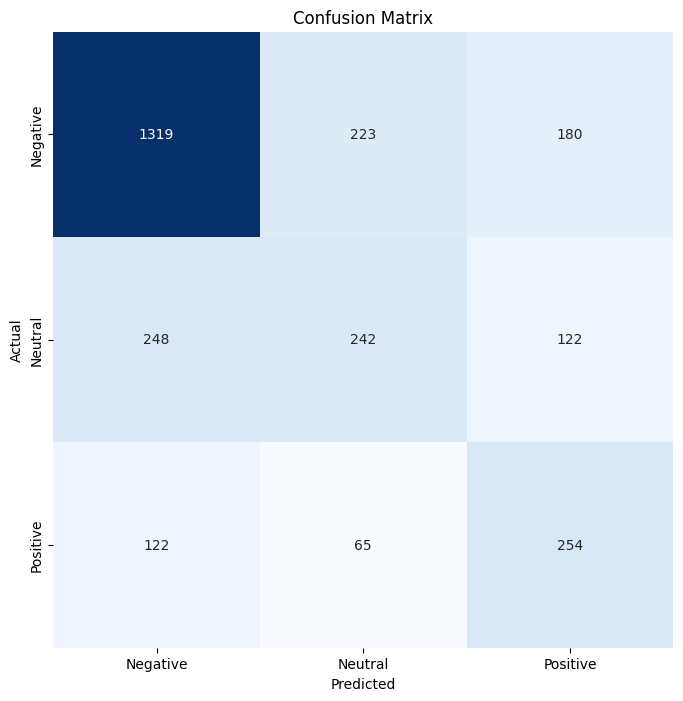

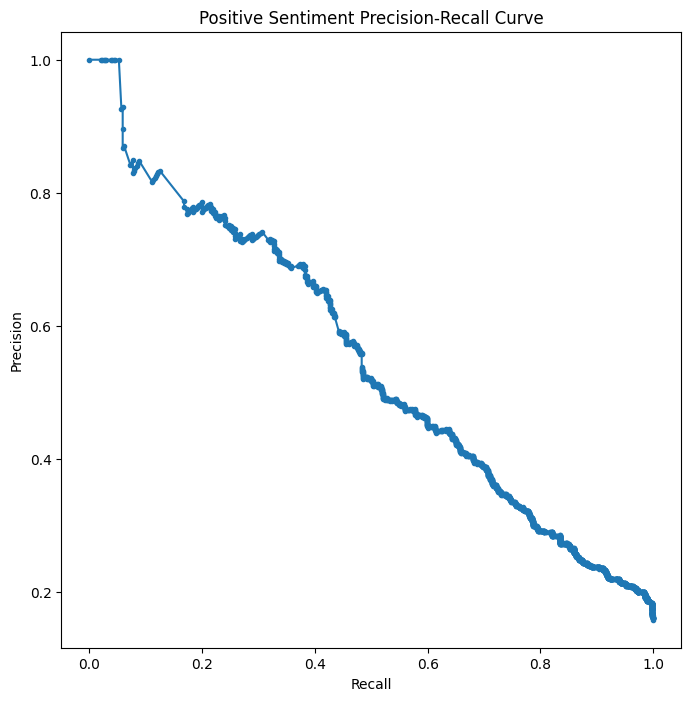

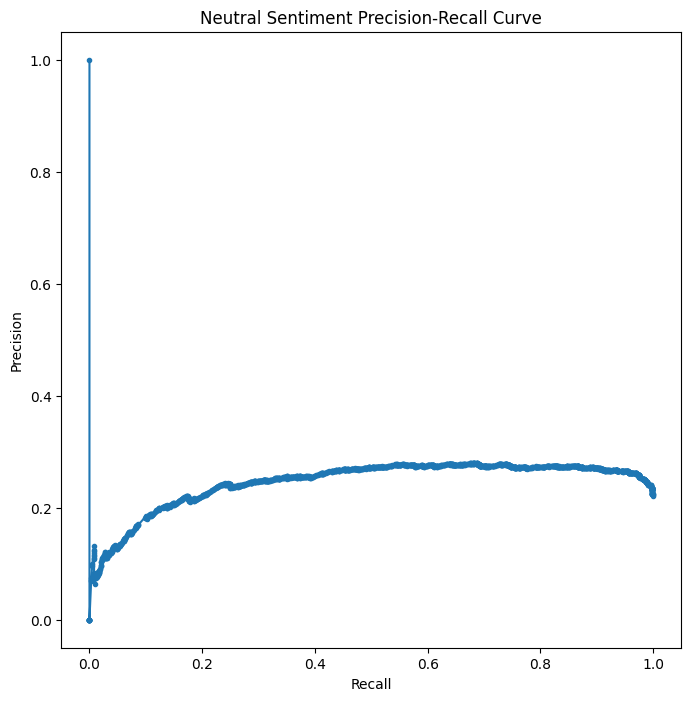

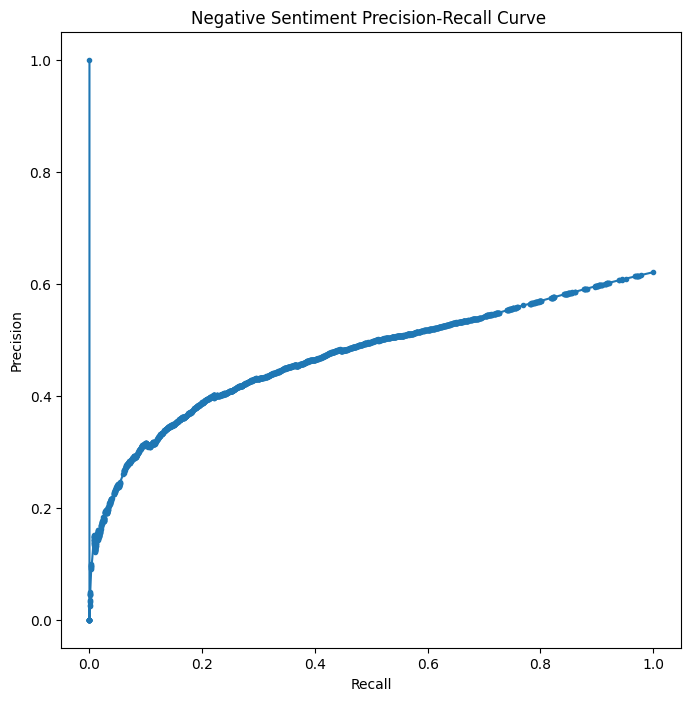

In [14]:
# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=nb_model.classes_, yticklabels=nb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve((test_df['sentiment'] == 'Positive').astype(int), nb_model.predict_proba(X_test)[:, 2])
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Positive Sentiment Precision-Recall Curve')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve((test_df['sentiment'] == 'Neutral').astype(int), nb_model.predict_proba(X_test)[:, 2])
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Neutral Sentiment Precision-Recall Curve')
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve((test_df['sentiment'] == 'Negative').astype(int), nb_model.predict_proba(X_test)[:, 2])
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Negative Sentiment Precision-Recall Curve ')
plt.show()


In [15]:
# Save the trained model
#import joblib
#joblib.dump(nb_model, 'naive_bayes_model.joblib')
#joblib.dump(vectorizer, 'vectorizer.joblib')